**Módulo 6:** Trabajando con Series y DataFrames

## Acostumbrándose a las Estructuras de Datos de Pandas
---

### Instalando el módulo `pandas`

Una manera de aumentar la capacidad de manejar datos tabulares en Python es hacer uso del módulo **Pandas** que permite trabajar con datos tabulares de cualquier tipo de dato y no sólamente numéricos.

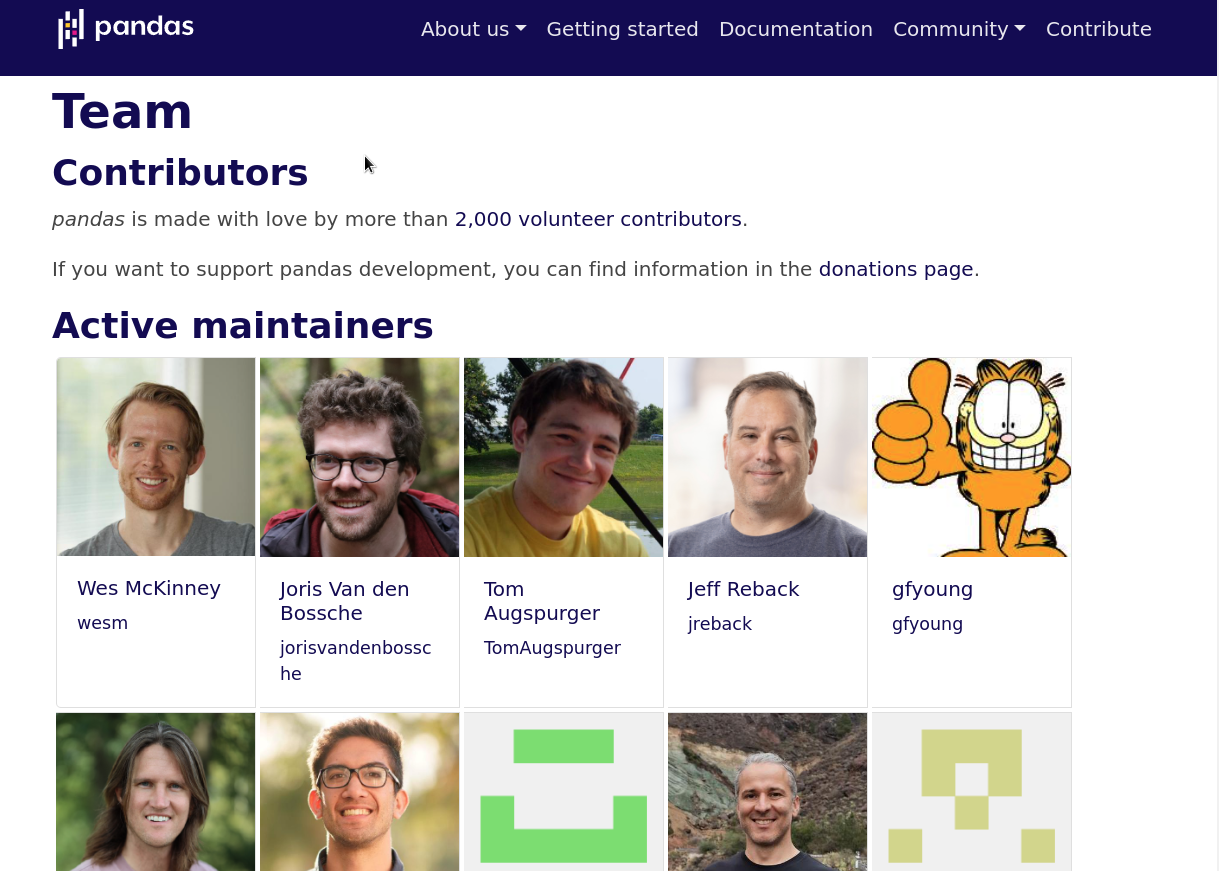

- [Sitipo principal de Pandas](https://pandas.pydata.org/)

Como el módulo `pandas` no es parte de la librería estándar, así que es necesario instalarlo:

In [ ]:
!pip install pandas

Y para validar su instalación se puede ejecutar la siguiente celda:

In [5]:
import pandas as pd

pd.__version__

'2.1.0'

### Creando Series

Para crear un array se usa la función o constructor `pd.Series()`, por ejemplo creamos la Serie de 5 números enteros:

`pd.Series(range(1, 6))`
o
`pd.Series(list)`

In [2]:
# usando range()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [3]:
# usando listas

0    1
1    2
2    3
3    4
4    5
dtype: int64

Con las series se puede mezclar tipos de datos numéricos y los tipos se respetan, pero el tipo general de la Serie es `object` que es algo similar a un tipo `str`, pero no necesariamente.

In [4]:
# Si son tipos de datos compatibles [1, 2, 3.5, 4, True]
mix1 = 
mix1

0         1
1         2
2       3.5
3    cuatro
4      True
dtype: object

In [5]:
# Si tenemos una cadena (str) [1, 2, 3.5, "cuatro", True]
# toda la Serie será de tipo object 
mix2 = 
mix2

0     uno
1     dos
2    tres
dtype: object

También se pueden crear Series vacias:

`pd.Series()`

Series([], dtype: object)

algo importante es que el tipo `object`es aplicado a una serie cuando no se puede determinar el tipo de dato para todos los elementos o el tipo de dato no es uniforme o los datos son de tipo `str`, veamos unos ejemplos:

Si tenemos una lista de edades con algunos datos mal capturados:

[22, 25, 31, 46, 31., 29.5, "Soy joven por siempre", 50]

In [1]:
s1 = 
s1

SyntaxError: invalid syntax (295762823.py, line 1)

O si tenemos listas de fechas como texto:

["01-01-2010", "02-02-2011", "01-03-2012", "30-04-2014"]

In [8]:
s2 = 
s2

0    01-01-2010
1    02-02-2011
2    01-03-2012
3    30-04-2014
dtype: object

In [2]:
# obten el tipo de dato del primer elemento

In [3]:
# obten el año como número de la última fecha

Y si los datos son de tipo texto:

["Hugo", "Paco", "Luis"]

In [13]:
nombres = 
nombres

0    Hugo
1    Paco
2    Luis
dtype: object

Pero si regresamos a las fechas y queremos crear una lista de tipo fecha y no de texto podemos usar la función de Pandas `pd.to_datetime(-fecha- o -lista de fechas-)` por ejemplo usemos las fechas de la serie `s2`:

In [19]:
fecha = pd.to_datetime(-una fecha-)
fecha

/tmp/ipykernel_2819644/3057026001.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fecha = pd.to_datetime("19-09-2023")


Timestamp('2023-09-19 00:00:00')

In [23]:
# obtén el mes de la fecha

0

In [26]:
# ahora aplicalo a toda la seria s2
s4 = pd.to_datetime(...)
s4

0   2010-01-01
1   2011-02-02
2   2012-03-01
3   2014-04-30
dtype: datetime64[ns]

Y si las fechas las proporciona un sistema en formato **Timestamp** o **Epoc**, por ejemplo la siguiente lista de fechas en segundos hay que indicarlo con el parámetro `unit="s"`:

[1262304000.0, 1296604800.0, 1330560000.0, 1398816000.0]

In [10]:
fechas_segundos = [1262304000.0, 1296604800.0, 1330560000.0, 1398816000.0, 0.0]
s5 = pd.to_datetime()
s5

TypeError: to_datetime() missing 1 required positional argument: 'arg'

También podemos crear Series usando `np.arange()` de Numpy, por ejemplo creamos el mismo array de numpy en el intervalo de [0, 100] en incrementos de 0.5:

In [33]:
import numpy as np

s7 = pd.Series( ... )
s7

0        0.0
1        0.5
2        1.0
3        1.5
4        2.0
       ...  
197     98.5
198     99.0
199     99.5
200    100.0
201    100.5
Length: 202, dtype: float64

Y la forma recomendada de contas los elementos de una serie: `serie.count()`

In [ ]:
...

Aunque también se puede usar la función `len(obj)` pero es menos eficiente

In [35]:
...

202

## Reorganización de Datos
---

### Indices en Series

Podemos crear Series con índices no numericos, por ejemplo fechas o nombre similar las llaves de un diccionario, por ejemplo usemos las fechas de la serie `s5` como índices o llaves y asignemos los siguientes valores de ventas para cada año:

[223716, 154153, 262178, 383874]

Usando la forma siguiente: `pd.Series(lista, index=lista)`

In [37]:
s5

0   2010-01-01
1   2011-02-02
2   2012-03-01
3   2014-04-30
dtype: datetime64[ns]

In [38]:
ventas = [223716, 154153, 262178, 383874]
s6 = pd.Series(...)
s6

2010-01-01    223716
2011-02-02    154153
2012-03-01    262178
2014-04-30    383874
dtype: int64

Observar como los valores de la serie `s5` fueron usados como los índices de la serie `s6`, así que para ver los valores de un año en partircular usamos la fecha como índice:

In [40]:
...

223716

También se pueden crear rebanadas (slices) de Series, por ejemplo podemos obtener la Serie de año 2010 al año 2012 usando la forma:

`serie[inicio:fin]`

In [42]:
...

2010-01-01    223716
2011-02-02    154153
2012-03-01    262178
dtype: int64

Los índices son almacenados en el atributo `pd.Series.index` y pueden ser manipulados por separado por ejemplo podemos obtener sólo la lista de años con una lista de compresión:

In [48]:
...

2010

Y entonces usar ésta lista para remplazar el índice de la Serie reasignando el atributo del índice en éste caso de la serie

`s6.index = pd.Index(nuevo_indice)`

In [49]:
...

2010    223716
2011    154153
2012    262178
2014    383874
dtype: int64

**Ejercicio:** Haciendo uso de Series de Pandas obten el porciento de participación en ventas de chips para cada vendedor en el año 2020 usando la siguiente tabla de datos. Usa el nombre de los vendedores como índice para tu serie resultante.

|    | Vendor                  |   2020 Revenue |
|---:|:------------------------|---------------:|
|  1 | Intel                   |          70244 |
|  2 | Samsung Electronics     |          56197 |
|  3 | SK hynix                |          25271 |
|  4 | Micron Technology       |          22098 |
|  5 | Qualcomm                |          17906 |
|  6 | Broadcom                |          15695 |
|  7 | Texas Instruments       |          13074 |
|  8 | MediaTek                |          11008 |
|  9 | KIOXIA                  |          10208 |
| 10 | Nvidia                  |          10095 |
| 11 | Others (outside top 10) |         198042 |

Fuente: https://www.gartner.com/en/newsroom/press-releases/2021-01-14-gartner-says-worldwide-semiconductor-revenue-grew-7-percent-in-2020

El resultado debería de ser como el siguiente:

| Vendedor                | Participación (%) |
|:------------------------|---------:|
| Intel                   | 15.6154  |
| Samsung Electronics     | 12.4927  |
| SK hynix                |  5.6178  |
| Micron Technology       |  4.91244 |
| Qualcomm                |  3.98054 |
| Broadcom                |  3.48903 |
| Texas Instruments       |  2.90638 |
| MediaTek                |  2.4471  |
| KIOXIA                  |  2.26926 |
| Nvidia                  |  2.24414 |
| Others (outside top 10) | 44.0252  |

**Tip** Puedes usar las siguiente listas de valores para trabajar
```
['70244', '56197', '25271', '22098', '17906', '15695', '13074', '11008', '10208', '10095', '198042']
       
['Intel', 'Samsung Electronics', 'SK hynix', 'Micron Technology', 'Qualcomm', 'Broadcom', 'Texas Instruments', 'MediaTek', 'KIOXIA', 'Nvidia', 'Others (outside top 10)']
```

### Graficando con el módulo matplotlib
---

Una de las librerías por excelencia para graficar con Pandas es usando el módulo `matplotlib`, matplotliob cuenta con muchas opciones para realizar gráficos como gráficas de barras, líneas, puntos, mapas de calor o de correlación por ejemplo.

### Instalación

Debido a que matplitlib no forma parte de la librería estándar, es necesario instalar el módulo usando el siguiente comando:

In [ ]:
!pip install matplotlib

Y para conocer más acerca del módulo o tener acceso a la documentación oficial se puede cosultar en el sitio:

- https://matplotlib.org

Ahora vamos a revisar el procedimiento para realizar nuestra primera gráfico de pastel y es como se muestra a continuación:

```
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie(-array-Y-, labels=-lista-ertiquetas-, autopct="%1.1f%%")
plt.savefig("nombre.ext")
plt.show()
```

Vamos a copiar y personalizar éste código para crear una gráfica de pastel que represente los datos del porciento de participación de la serie de `participacion`:

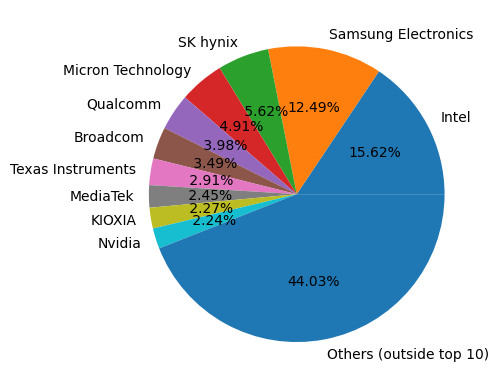

In [15]:
import matplotlib.pyplot as plt

